In [1]:
"""
Chapter_1.1.4. SVM: Maximum margin separating hyperplane
参考
http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [2]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

print(X[0:3])
print(y)

[[  6.37734541 -10.61510727]
 [  6.50072722  -3.82403586]
 [  4.29225906  -8.99220442]]
[1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0
 1 0 1]


In [3]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

print(clf.support_vectors_[:, 0])
print(clf.support_vectors_[:, 1])

[ 7.27059007  5.95313618  7.89359985]
[-4.84225716 -6.82945967 -7.41655113]


In [4]:
# plot coordinates
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [5]:
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

print(xx)
print(yy)
print(YY.shape)
print(XX.shape)
print(xy.shape)
print(Z[0:5,0:5])
print(Z[0:5,25:30])
print(Z[25:30,0:5])
print(Z[25:30,25:30])

[  3.97345001   4.20909975   4.4447495    4.68039924   4.91604899
   5.15169874   5.38734848   5.62299823   5.85864798   6.09429772
   6.32994747   6.56559721   6.80124696   7.03689671   7.27254645
   7.5081962    7.74384594   7.97949569   8.21514544   8.45079518
   8.68644493   8.92209467   9.15774442   9.39339417   9.62904391
   9.86469366  10.10034341  10.33599315  10.5716429   10.80729264]
[-11.08232623 -10.73743894 -10.39255164 -10.04766434  -9.70277705
  -9.35788975  -9.01300245  -8.66811515  -8.32322786  -7.97834056
  -7.63345326  -7.28856597  -6.94367867  -6.59879137  -6.25390407
  -5.90901678  -5.56412948  -5.21924218  -4.87435489  -4.52946759
  -4.18458029  -3.83969299  -3.4948057   -3.1499184   -2.8050311
  -2.46014381  -2.11525651  -1.77036921  -1.42548192  -1.08059462]
(30, 30)
(30, 30)
(900, 2)
[[ 5.0672251   4.77818752  4.48914993  4.20011235  3.91107477]
 [ 5.00737673  4.71833915  4.42930157  4.14026398  3.8512264 ]
 [ 4.94752837  4.65849078  4.3694532   4.08041562  3.7

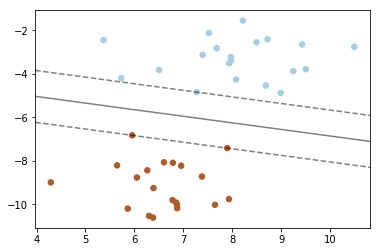

In [6]:
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()